In [1]:
%matplotlib inline


# ODP Bootstrap Example


This example demonstrates how you can can use the Overdispersed Poisson
Bootstrap sampler and get various properties about parameter uncertainty.



In [31]:
import chainladder as cl
import matplotlib.pyplot as plt

#  Grab a Triangle
tri = cl.load_sample('genins')
# Generate bootstrap samples
sims = cl.BootstrapODPSample(n_sims=1000, n_periods=-1, hat_adj=True).fit_transform(tri)

In [33]:
tri

,12,24,36,48,60,72,84,96,108,120
2001,"357,848","1,124,788","1,735,330","2,218,270","2,745,596","3,319,994","3,466,336","3,606,286","3,833,515","3,901,463"
2002,"352,118","1,236,139","2,170,033","3,353,322","3,799,067","4,120,063","4,647,867","4,914,039","5,339,085",
2003,"290,507","1,292,306","2,218,525","3,235,179","3,985,995","4,132,918","4,628,910","4,909,315",,
2004,"310,608","1,418,858","2,195,047","3,757,447","4,029,929","4,381,982","4,588,268",,,
2005,"443,160","1,136,350","2,128,333","2,897,821","3,402,672","3,873,311",,,,
2006,"396,132","1,333,217","2,180,715","2,985,752","3,691,712",,,,,
2007,"440,832","1,288,463","2,419,861","3,483,130",,,,,,
2008,"359,480","1,421,128","2,864,498",,,,,,,
2009,"376,686","1,363,294",,,,,,,,
2010,"344,014",,,,,,,,,


In [34]:
sims

,Triangle Summary
Valuation:,2010-12
Grain:,OYDY
Shape:,"(1000, 1, 10, 10)"
Index:,[Total]
Columns:,[values]


In [22]:
sims.index

,Total
0,0
1,1
2,2
3,3
4,4
...,...
995,995
996,996
997,997
998,998


In [40]:
# Calculate LDF for each simulation
sim_ldf = cl.Development().fit(sims).ldf_
sim_ldf.loc[0]

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),3.5594,1.9399,1.4469,1.1691,1.0984,1.0652,1.0775,1.1042,0.9929


In [41]:
sim_ldf.loc[1]

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),3.6617,1.5789,1.3994,1.1782,1.1292,1.1054,1.0317,1.0605,1.0351


/Users/holmen1/opt/anaconda3/lib/python3.7/site-packages/chainladder/core/pandas.py:280: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


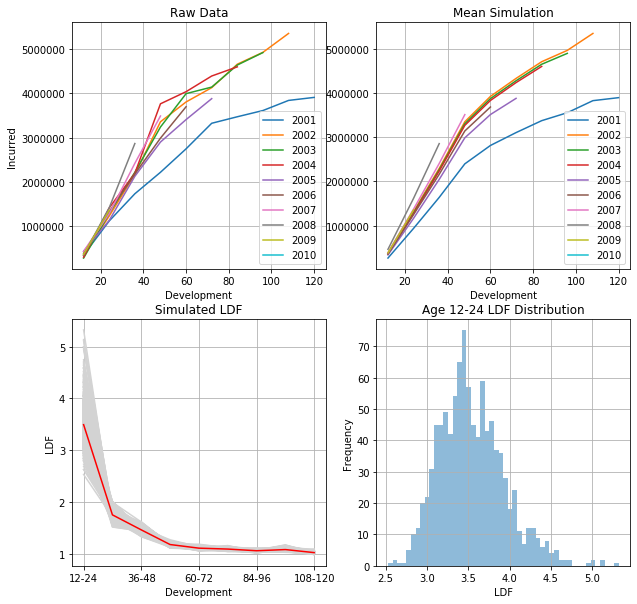

In [42]:
# Plot the Data
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
# Plot 1
tri.T.plot(ax=ax00, grid=True).set(title='Raw Data', xlabel='Development', ylabel='Incurred')
# Plot 2
sims.mean().T.plot(ax=ax01, grid=True).set(title='Mean Simulation', xlabel='Development')
# Plot 3
sim_ldf.T.plot(legend=False, color='lightgray', ax=ax10, grid=True).set(
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
cl.Development().fit(tri).ldf_.drop_duplicates().T.plot(
    legend=False, color='red', ax=ax10, grid=True)
# Plot 4
sim_ldf.T.loc['12-24'].plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11 , grid=True).set(
    title='Age 12-24 LDF Distribution', xlabel='LDF');